In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [54]:
df=pd.read_csv('heart.csv')

In [55]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [5]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


<AxesSubplot:xlabel='HeartDisease', ylabel='HeartDisease'>

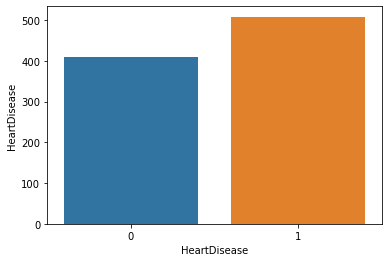

In [7]:
sns.barplot(x=df['HeartDisease'],y=df['HeartDisease'].value_counts())

In [8]:
af=df.select_dtypes(include=['object','uint8'])

In [9]:
af=pd.get_dummies(af)

In [10]:
af.head()

,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [11]:
df=df.select_dtypes(exclude=['object','uint8'])
sk=pd.concat([df,af],axis=1)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X=sk.drop('HeartDisease',axis=1)
y=sk['HeartDisease']

In [14]:
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [15]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [16]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
X_train

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
585,57,180,285,1,120,0.8,0,1,0,1,0,0,0,0,1,1,0,0,1,0
169,58,140,179,0,160,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,1
602,61,120,337,0,98,0.0,0,1,0,0,1,0,0,1,0,0,1,0,1,0
140,52,160,331,0,94,2.5,0,1,1,0,0,0,0,1,0,0,1,0,1,0
173,49,140,187,0,172,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,48,120,254,0,110,0.0,1,0,1,0,0,0,0,0,1,1,0,0,0,1
270,45,120,225,0,140,0.0,0,1,1,0,0,0,0,1,0,1,0,0,0,1
860,60,130,253,0,144,1.4,0,1,1,0,0,0,0,1,0,0,1,0,0,1
435,60,152,0,0,118,0.0,0,1,1,0,0,0,0,0,1,0,1,0,0,1


In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [19]:
X_train=scaler.fit_transform(X_train)

In [20]:
X_test=scaler.transform(X_test)

In [21]:
from sklearn.linear_model import LogisticRegression 

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
from sklearn.linear_model import ElasticNetCV

In [24]:
model=ElasticNetCV(cv=10,l1_ratio=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

In [25]:
model.fit(X_train,y_train)

ElasticNetCV(cv=10, l1_ratio=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

In [26]:
model.l1_ratio_

1.0

In [27]:
model.alpha_

0.010474780398370746

In [28]:
#Use these saga and ovr for multiclass logistic regression
model=LogisticRegression(solver='saga',multi_class='ovr')

In [29]:
model.fit(X_train,y_train)

LogisticRegression(multi_class='ovr', solver='saga')

In [30]:
pred=model.predict(X_test)

In [31]:
pred

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,

In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [33]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86       138
           1       0.86      0.93      0.89       165

    accuracy                           0.88       303
   macro avg       0.88      0.87      0.88       303
weighted avg       0.88      0.88      0.88       303



In [34]:
accuracy_score(pred,y_test)*100

87.78877887788778

In [35]:
confusion_matrix(pred,y_test)

array([[112,  26],
       [ 11, 154]], dtype=int64)

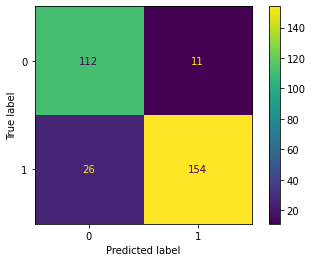

In [36]:
plot_confusion_matrix(model,X_test,y_test)

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
#C is the strength of regularization smaller values specify stronge regularization.
param_grid={'C':np.logspace(0,5,10),'penalty':['l1','l2']}

In [39]:
grid_model=GridSearchCV(model,param_grid=param_grid,cv=5)

In [40]:
grid_model.fit(X_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was re

GridSearchCV(cv=5,
             estimator=LogisticRegression(multi_class='ovr', solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.59381366e+00, 1.29154967e+01, 4.64158883e+01,
       1.66810054e+02, 5.99484250e+02, 2.15443469e+03, 7.74263683e+03,
       2.78255940e+04, 1.00000000e+05]),
                         'penalty': ['l1', 'l2']})

In [41]:
grid_model.best_estimator_

LogisticRegression(multi_class='ovr', penalty='l1', solver='saga')

In [42]:
grid_model.best_params_

{'C': 1.0, 'penalty': 'l1'}

In [43]:
predict=grid_model.predict(X_test)

In [44]:
accuracy_score(predict,y_test)*100

87.12871287128714

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
model=KNeighborsClassifier()

In [47]:
param_grid={'n_neighbors':[x for x in range(1,20)],'weights':['uniform','distance']}

In [48]:
grid_model=GridSearchCV(model,param_grid=param_grid,cv=5)

In [49]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'weights': ['uniform', 'distance']})

In [50]:
grid_model.best_estimator_

KNeighborsClassifier(n_neighbors=11)

In [51]:
y_agpred=grid_model.predict(X_test)

In [52]:
accuracy_score(y_test,y_agpred)

0.8613861386138614

In [53]:
import tensorflow as tf

In [56]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [61]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [62]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [63]:
df.duplicated().sum()

0

In [64]:
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


In [70]:
object_type = df.select_dtypes(include='object')
object_type = pd.get_dummies(object_type)
object_type.head()

,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [66]:
non_object = df.select_dtypes(exclude='object')
non_object

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1
914,68,144,193,1,141,3.4,1
915,57,130,131,0,115,1.2,1
916,57,130,236,0,174,0.0,1


In [71]:
new_df = pd.concat([object_type,non_object],axis=1)
new_df.head()

,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,...,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,0,1,0,1,0,0,0,1,0,1,...,0,0,1,40,140,289,0,172,0.0,0
1,1,0,0,0,1,0,0,1,0,1,...,0,1,0,49,160,180,0,156,1.0,1
2,0,1,0,1,0,0,0,0,1,1,...,0,0,1,37,130,283,0,98,0.0,0
3,1,0,1,0,0,0,0,1,0,0,...,0,1,0,48,138,214,0,108,1.5,1
4,0,1,0,0,1,0,0,1,0,1,...,0,0,1,54,150,195,0,122,0.0,0


In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [75]:
from sklearn.model_selection import train_test_split
X = new_df.drop('HeartDisease',axis=1)
y = new_df['HeartDisease']

In [76]:
X.head()

,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,40,140,289,0,172,0.0
1,1,0,0,0,1,0,0,1,0,1,0,0,1,0,49,160,180,0,156,1.0
2,0,1,0,1,0,0,0,0,1,1,0,0,0,1,37,130,283,0,98,0.0
3,1,0,1,0,0,0,0,1,0,0,1,0,1,0,48,138,214,0,108,1.5
4,0,1,0,0,1,0,0,1,0,1,0,0,0,1,54,150,195,0,122,0.0


In [77]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [79]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [81]:
len(X.columns)

20

In [83]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(len(X.columns),activation='relu'),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [84]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [90]:
history = model.fit(X_train,y_train,epochs=200,batch_size=32)

Epoch 1/200
20/20 [==============================] - 0s 3ms/step - loss: 0.1205 - accuracy: 0.9545
Epoch 2/200
20/20 [==============================] - 0s 3ms/step - loss: 0.1389 - accuracy: 0.9431
Epoch 3/200
20/20 [==============================] - 0s 3ms/step - loss: 0.1512 - accuracy: 0.9415
Epoch 4/200
20/20 [==============================] - 0s 4ms/step - loss: 0.1338 - accuracy: 0.9463
Epoch 5/200
20/20 [==============================] - 0s 3ms/step - loss: 0.0890 - accuracy: 0.9642
Epoch 6/200
20/20 [==============================] - 0s 3ms/step - loss: 0.0803 - accuracy: 0.9740
Epoch 7/200
20/20 [==============================] - 0s 3ms/step - loss: 0.0774 - accuracy: 0.9691
Epoch 8/200
20/20 [==============================] - 0s 3ms/step - loss: 0.0871 - accuracy: 0.9610
Epoch 9/200
20/20 [==============================] - 0s 3ms/step - loss: 0.0933 - accuracy: 0.9577
Epoch 10/200
20/20 [==============================] - 0s 3ms/step - loss: 0.0778 - accuracy: 0.9691
Epoch 11/

20/20 [==============================] - 0s 3ms/step - loss: 0.0280 - accuracy: 0.9919
Epoch 165/200
20/20 [==============================] - 0s 3ms/step - loss: 0.0323 - accuracy: 0.9902
Epoch 166/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0146 - accuracy: 0.9935
Epoch 167/200
20/20 [==============================] - 0s 3ms/step - loss: 0.0115 - accuracy: 0.9951
Epoch 168/200
20/20 [==============================] - 0s 3ms/step - loss: 0.0166 - accuracy: 0.9919
Epoch 169/200
20/20 [==============================] - 0s 3ms/step - loss: 0.0558 - accuracy: 0.9789
Epoch 170/200
20/20 [==============================] - 0s 3ms/step - loss: 0.0665 - accuracy: 0.9756
Epoch 171/200
20/20 [==============================] - 0s 3ms/step - loss: 0.0387 - accuracy: 0.9821
Epoch 172/200
20/20 [==============================] - 0s 3ms/step - loss: 0.0418 - accuracy: 0.9837
Epoch 173/200
20/20 [==============================] - 0s 3ms/step - loss: 0.0833 - accuracy: 0.9789
Epoc

In [91]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                420       
                                                                 
 dense_1 (Dense)             (None, 100)               2100      
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 13,641
Trainable params: 13,641
Non-trainable params: 0
_________________________________________________________________


In [92]:
model.evaluate(X_test,y_test)

10/10 [==============================] - 0s 3ms/step - loss: 3.3226 - accuracy: 0.8284


[3.3226470947265625, 0.8283828496932983]

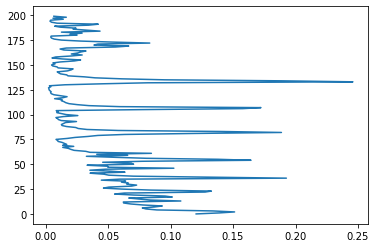

In [93]:
epochs = range(len(history.history['loss']))
plt.plot(history.history['loss'],epochs)

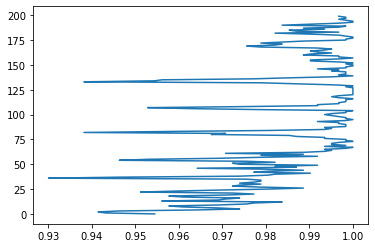

In [95]:
plt.plot(history.history['accuracy'],epochs)